## The Poisson as a limiting case of the Binomial

Consider a Binomial process with $N$ trials and success probability $p$. We wish to consider the situation where $N \to \infty$ and $p \to 0$ but $N p = \lambda$, a constant. In this case, the probability of $k$ successes in $N$ trials is:
\begin{align*}
{N \choose k} p^k (1 - p)^{N - k} & = \frac{N!}{k! (N - k)!} p^k (1 - p)^{N - k} \\
    & = \frac{1}{k!} \cdot \frac{(N - k + 1) (N - k + 2) \cdots N}{N^k} 
        \cdot (Np)^k 
        \cdot \left ( 1 - \frac{\lambda}{N} \right )^{N - k} \\
    & = \frac{\lambda^k}{k!} \left ( 1 - \frac{k - 1}{N} \right ) 
        \left ( 1 - \frac{k - 2}{N} \right ) \frac{N}{N} 
        \cdot \frac{1}{(1 - \lambda / N)^k} \cdot \left ( 1 - \frac{\lambda}{N}\right )^N 
\end{align*}
As $N \to \infty$ and $p \to 0$, the above approaches $\lambda^k e^{-\lambda} / k!$, which is the pmf of the Poisson distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom, poisson 

In [2]:
y = binom.rvs(n=1000, p=1/1000, size=int(1e5))
np.mean(y), np.var(y)

(1.0026, 0.99517324)

## Poisson Regression

\begin{align*}
    y_i              & \sim \text{Poisson}(\lambda_i) \\
    \log (\lambda_i) & = \alpha + \beta (x_i - \bar{x})
\end{align*}

### Oceanic Tool Complexity

In [3]:
KLINE_DATASET = '../../data/kline.csv'

In [4]:
df = pd.read_csv(KLINE_DATASET)
df

,culture,population,contact,total_tools,mean_TU
0,Malekula,1100,low,13,3.2
1,Tikopia,1500,low,22,4.7
2,Santa Cruz,3600,low,24,4.0
3,Yap,4791,high,43,5.0
4,Lau Fiji,7400,high,33,5.0
5,Trobriand,8000,high,19,4.0
6,Chuuk,9200,high,40,3.8
7,Manus,13000,low,28,6.6
8,Tonga,17500,high,55,5.4
9,Hawaii,275000,low,71,6.6


### Code 11.37

In [5]:
df.loc[:, 'log_p'] = np.log(df['population'].values)
df.loc[:, 'contact_id'] = np.where(df['contact'] == 'high', 1, 0)

In [6]:
df

,culture,population,contact,total_tools,mean_TU,log_p,contact_id
0,Malekula,1100,low,13,3.2,7.003065,0
1,Tikopia,1500,low,22,4.7,7.313220,0
2,Santa Cruz,3600,low,24,4.0,8.188689,0
3,Yap,4791,high,43,5.0,8.474494,1
4,Lau Fiji,7400,high,33,5.0,8.909235,1
5,Trobriand,8000,high,19,4.0,8.987197,1
6,Chuuk,9200,high,40,3.8,9.126959,1
7,Manus,13000,low,28,6.6,9.472705,0
8,Tonga,17500,high,55,5.4,9.769956,1
9,Hawaii,275000,low,71,6.6,12.524526,0


# The Model

The model postulates that the number of tools used (`total_tools`) in a given `culture` varies as follows:

1. the `total_tools` increases with the log of the `population` 
2. the `total_tools` increases with the `contact` rate
3. the impact of `population` on `total_tools` is moderated by the `contact` rate

\begin{align*}
    T_i                & \sim \text{Poisson}(\lambda_i) \\
    \log \lambda_i     & = \alpha_{\text{cid}[i]} + \beta_{\text{cid}[i]} \cdot \log P_i \\
    \alpha_0, \alpha_1 & \sim \text{ to be determined } \\
    \beta_0, \beta_1   & \sim \text{ to be determined }
\end{align*}

## Determining Priors

### Model with intercept only

\begin{align*}
    T_i                & \sim \text{Poisson}(\lambda_i) \\
    \log \lambda_i     & = \alpha \\
    \alpha             & \sim \text{Normal}(0, 10) \\
\end{align*}

If $\alpha$ has the normal distribution, then $\lambda$ has the log-normal distribution.

No handles with labels found to put in legend.


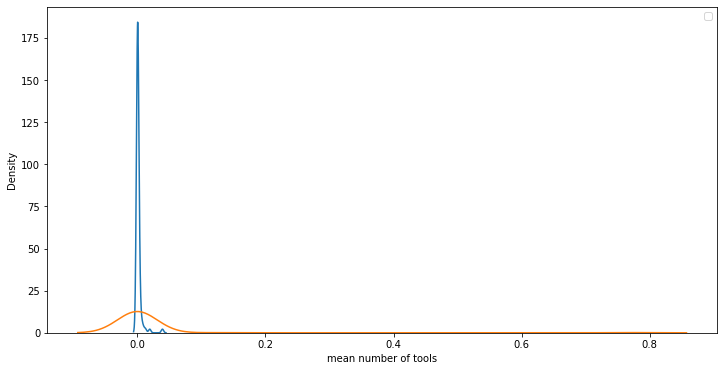

In [10]:
import seaborn as sns

# def lognorm(x, mu, sigma):
#     const = np.where(x == 0, 0, 1 / (x * sigma * np.sqrt(2 * np.pi)))
#     exponent = np.log(x - mu)**2 / (2 * sigma**2)
#     return const * np.exp(-exponent)

from scipy.stats import lognorm

x_vals = np.linspace(0, 100, 100)
dist1 = lognorm(10, loc=0)
dist2 = lognorm(0.5, loc=3)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(x_vals, dist1.pdf(x_vals), 'k', label=r'$a \sim N(0, 10)$')
ax.plot(x_vals, dist2.pdf(x_vals), 'b', label=r'$a \sim N(3, 0.5)$')

# sns.kdeplot(dist1.pdf(x_vals), ax=ax)
# sns.kdeplot(dist2.pdf(x_vals), ax=ax)
ax.set_xlabel("mean number of tools")
ax.set_ylabel("Density")

plt.legend()
plt.show();